In [1]:
from pathlib import Path
print(Path.cwd())

c:\Users\tsnmi\GitHub_Work\pandas-daily-practice\Practice With JSON


In [2]:
import json,pandas as pd

pd.set_option('display.max_columns', 50)
pd.set_option('display.width',120)

records = []
path = Path.cwd()/"used_cars_test.json"

f = open(path)
for l in f:
    d = json.loads(l)
    records.append(d)
f.close()

df = pd.DataFrame(records)
df.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date
0,7302167311,6795,2008.0,chevrolet,equinox,excellent,6 cylinders,gas,101000.0,clean,automatic,4wd,mid-size,SUV,silver,pa,2021-04-05T13:45:59-0400
1,7316341181,4150,2006.0,jeep,commander,good,8 cylinders,gas,180000.0,clean,automatic,4wd,full-size,SUV,custom,il,2021-05-03T13:37:51-0500
2,7309508177,10480,2008.0,toyota,rav4,good,6 cylinders,gas,98000.0,clean,automatic,4wd,mid-size,SUV,green,ma,2021-04-19T17:39:48-0400
3,7309962946,4450,2012.0,fiat,500 pop,excellent,4 cylinders,gas,83000.0,clean,automatic,fwd,compact,hatchback,grey,me,2021-04-20T15:00:01-0400
4,7305843479,13999,2007.0,cadillac,escalade,excellent,8 cylinders,gas,110958.0,clean,automatic,rwd,full-size,SUV,blue,ca,2021-04-12T13:37:43-0700


In [3]:
df.shape, df.dtypes

((7920, 17),
 id                int64
 price             int64
 year            float64
 manufacturer        str
 model               str
 condition           str
 cylinders           str
 fuel                str
 odometer        float64
 title_status        str
 transmission        str
 drive               str
 size                str
 type                str
 paint_color         str
 state               str
 posting_date        str
 dtype: object)

In [10]:
df.isna().mean().sort_values(ascending=False).head(20)

id              0.0
price           0.0
year            0.0
manufacturer    0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
size            0.0
type            0.0
paint_color     0.0
state           0.0
posting_date    0.0
dtype: float64

In [8]:

categorical_cols = ["manufacturer", "model", "fuel", "transmission", "drive", "state", "type", "paint_color", "title_status"]
for c in categorical_cols:
    if c in df.columns:
        df[c] = df[c].astype("category")

quant_cols = ["price", "year", "odometer"]
df[categorical_cols + quant_cols].head()

,manufacturer,model,fuel,transmission,drive,state,type,paint_color,title_status,price,year,odometer
0,chevrolet,equinox,gas,automatic,4wd,pa,SUV,silver,clean,6795,2008.0,101000.0
1,jeep,commander,gas,automatic,4wd,il,SUV,custom,clean,4150,2006.0,180000.0
2,toyota,rav4,gas,automatic,4wd,ma,SUV,green,clean,10480,2008.0,98000.0
3,fiat,500 pop,gas,automatic,fwd,me,hatchback,grey,clean,4450,2012.0,83000.0
4,cadillac,escalade,gas,automatic,rwd,ca,SUV,blue,clean,13999,2007.0,110958.0


In [13]:
brand_counts = df["manufacturer"].value_counts()
brand_counts_sorted_by_value = brand_counts.sort_values(ascending=False)
brand_counts_sorted_by_value.head(20)

manufacturer
ford             1573
chevrolet        1166
toyota            666
honda             486
nissan            416
gmc               351
jeep              314
ram               301
dodge             260
bmw               219
volkswagen        194
hyundai           190
mercedes-benz     188
subaru            174
kia               141
chrysler          138
lexus             115
cadillac          113
buick             107
mazda              99
Name: count, dtype: int64

In [14]:
brand_counts_sorted_by_index = brand_counts.sort_index()
brand_counts_sorted_by_index.head(20)

manufacturer
acura                65
alfa-romeo            3
audi                 92
bmw                 219
buick               107
cadillac            113
chevrolet          1166
chrysler            138
datsun                1
dodge               260
fiat                 16
ford               1573
gmc                 351
harley-davidson       2
honda               486
hyundai             190
infiniti             71
jaguar               27
jeep                314
kia                 141
Name: count, dtype: int64

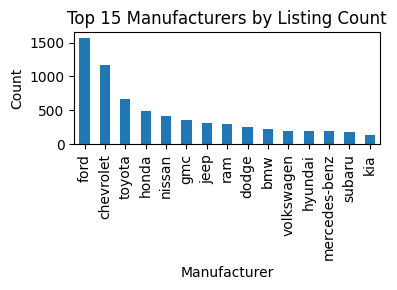

In [16]:
import matplotlib.pyplot as plt

# Plot by values (top 15)
plt.figure(figsize=(4,3))
brand_counts_sorted_by_value.head(15).plot(kind="bar")
plt.title("Top 15 Manufacturers by Listing Count")
plt.xlabel("Manufacturer")
plt.ylabel("Count")
plt.tight_layout()
plt.show()